# Del 1: Pandas Time Series - Vaje

## Vaja 1

###  Import the necessary libraries

In [70]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

### Import the dataset from URL and assign it to a variable apple

In [2]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv'

In [74]:
apple = pd.read_csv(url)
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Check out the type of the columns

In [75]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Transform the Date column as a datetime type

In [76]:
apple['Date'] = pd.to_datetime(apple['Date'], format='%Y-%m-%d')
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

### Set the date as the index

In [77]:
apple = apple.set_index('Date')

In [78]:
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Is there any duplicate dates?

In [60]:
apple.duplicated(subset=None, keep='first').head()

Date
2014-07-08    False
2014-07-07    False
2014-07-03    False
2014-07-02    False
2014-07-01    False
dtype: bool

In [51]:
#duplicate = apple[apple.duplicated(['Date'])]

In [50]:
#bool_series = apple['Date'].duplicated() 

In [58]:
duplicate_rows_df = apple[apple.duplicated()]
duplicate_rows_df

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,


### Sort the index to be the first entry the oldest date

In [65]:
apple = apple.sort_values('Date')
apple.head(10)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-19,28.25,28.38,28.25,28.25,12157600,0.44
1980-12-22,29.63,29.75,29.63,29.63,9340800,0.46
1980-12-23,30.88,31.00,30.88,30.88,11737600,0.48
1980-12-24,32.50,32.63,32.50,32.50,12000800,0.51


### Get the last business day of each month

In [69]:
#pd.date_range('Date', periods=8, freq='H')
#apple['Date'] = (apple.index + pd.offsets.Date(1)).day

### What is the difference in days between the first day and the oldest

In [81]:
diff_index = (apple.index[0] - apple.index[-1]).days
print(diff_index)

12261


### How many months in the data we have?

In [82]:
#apple = apple.set_index('Date').month

### Plot the 'Adj Close' value

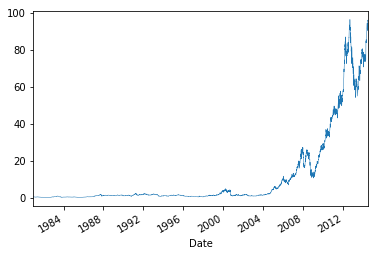

In [72]:
apple['Adj Close'].plot(linewidth=0.5) 
plt.show()